## Bank Customer Churn Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
backup_df = df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.shape

(10002, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


##### Columns:
- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dfnull = df[df.isna().any(axis=1)]
df[df.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

In [9]:
print(f"mean: {df['Age'].mean()}")
print(f"median: {df['Age'].median()}")

mean: 38.92231076892311
median: 37.0


In [10]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    7056
0.0    2945
Name: count, dtype: int64

In [11]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5150
0.0    4851
Name: count, dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

geo = df[['Geography']]
card_active = df[['HasCrCard', 'IsActiveMember']]
age = df[['Age']]

imp_geo = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_card = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_age = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_geo = imp_geo.fit_transform(geo)
imputed_card = imp_card.fit_transform(card_active)
imputed_age = imp_age.fit_transform(age)

df[['Geography']] = imputed_geo
df[['HasCrCard', 'IsActiveMember']] = imputed_card
df[['Age']] = imputed_age

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
dfnull

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [14]:
df[df['RowNumber'].isin([5,7,9,10])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,1.0,1.0,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50.000000,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.000000,4,142051.07,2,0.0,1.0,74940.50,0
9,10,15592389,H?,684,France,Male,38.922311,2,134603.88,1,1.0,1.0,71725.73,0


In [15]:
df.duplicated().sum()

np.int64(2)

In [16]:
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [17]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


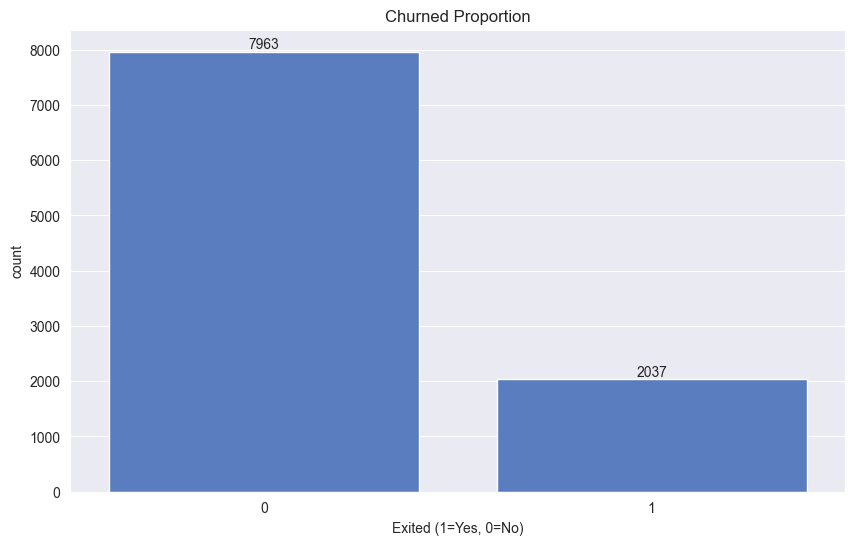

In [19]:
sns.set_style("darkgrid")
sns.set_palette("muted")
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
plt.title("Churned Proportion")
plt.xlabel("Exited (1=Yes, 0=No)")
plt.show()

In [20]:
df['CreditScore'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0


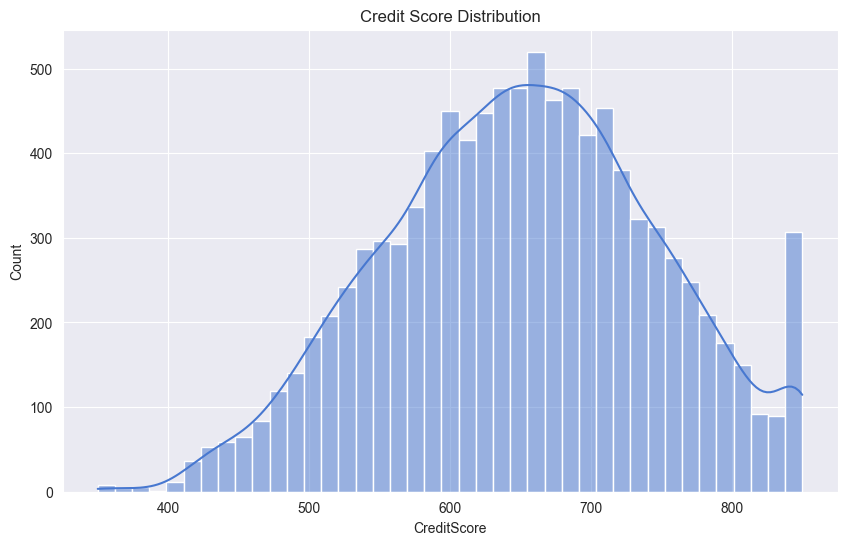

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['CreditScore'], kde=True)
plt.title("Credit Score Distribution")
plt.show()

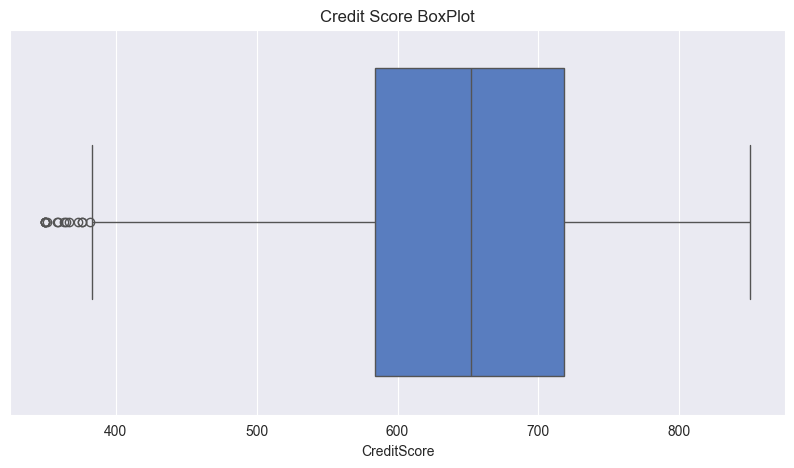

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['CreditScore'])
plt.title('Credit Score BoxPlot')
plt.show()

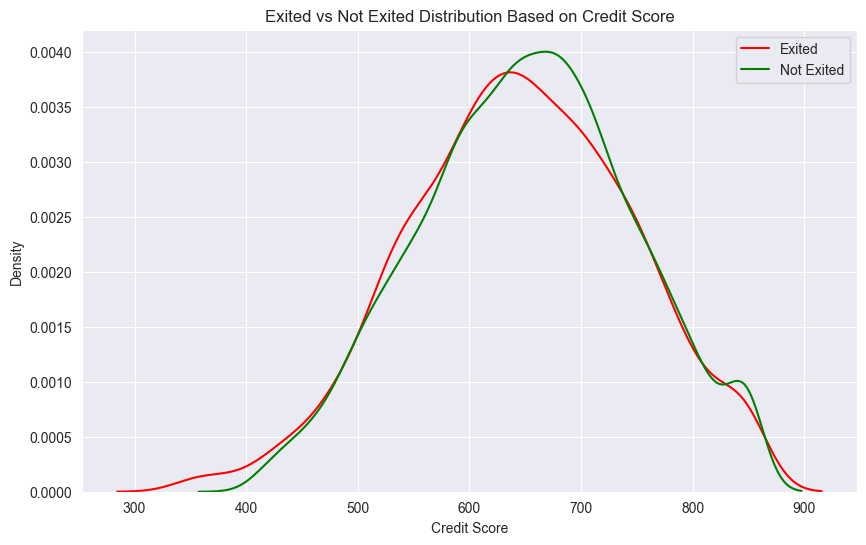

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Exited'] == 1]['CreditScore'], label='Exited', color='Red')         # type:ignore
sns.kdeplot(df[df['Exited'] == 0]['CreditScore'], label='Not Exited', color='Green')   # type:ignore
plt.title("Exited vs Not Exited Distribution Based on Credit Score")
plt.xlabel("Credit Score")
plt.legend()
plt.show()

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


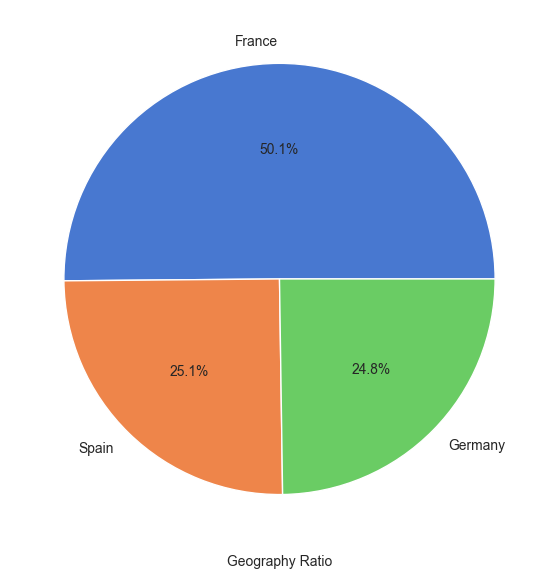

In [25]:
plt.figure(figsize=(10,7))
plt.pie(df['Geography'].value_counts(), autopct="%1.1f%%", labels=df['Geography'].unique())
plt.xlabel("Geography Ratio")
plt.show()

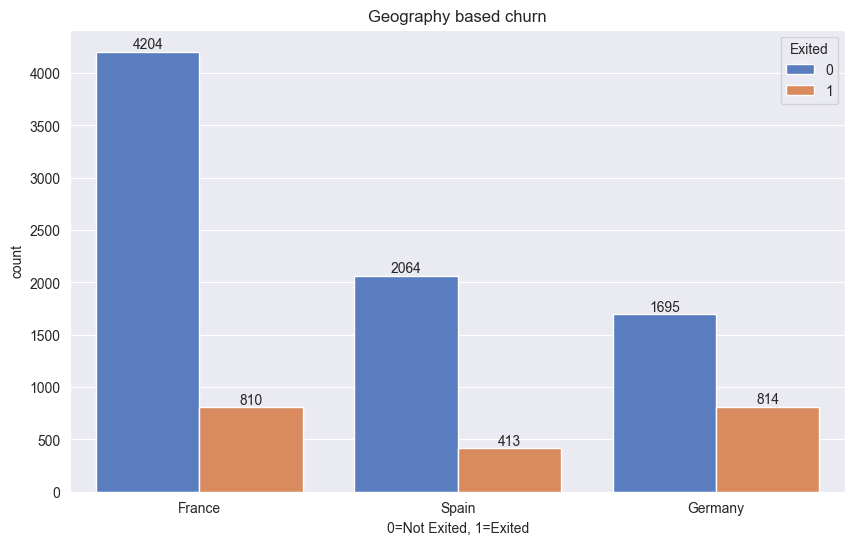

In [26]:
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Geography'], hue=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
cp.bar_label(cp.containers[1]) # type: ignore 
plt.title("Geography based churn")
plt.xlabel("0=Not Exited, 1=Exited")
plt.show()

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


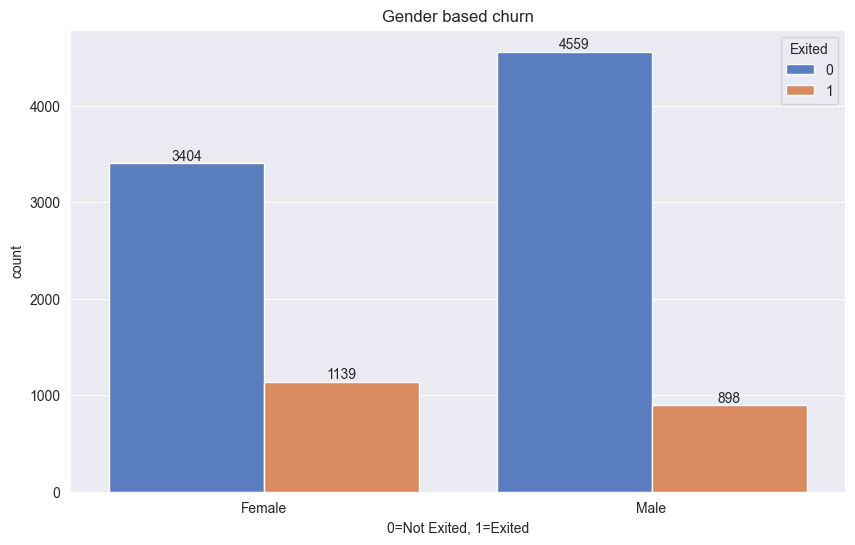

In [28]:
plt.figure(figsize=(10,6))
cp = sns.countplot(x=df['Gender'], hue=df['Exited'])
cp.bar_label(cp.containers[0]) # type: ignore
cp.bar_label(cp.containers[1]) # type: ignore 
plt.title("Gender based churn")
plt.xlabel("0=Not Exited, 1=Exited")
plt.show()

In [29]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.923095,10.48711,18.0,32.0,37.0,44.0,92.0


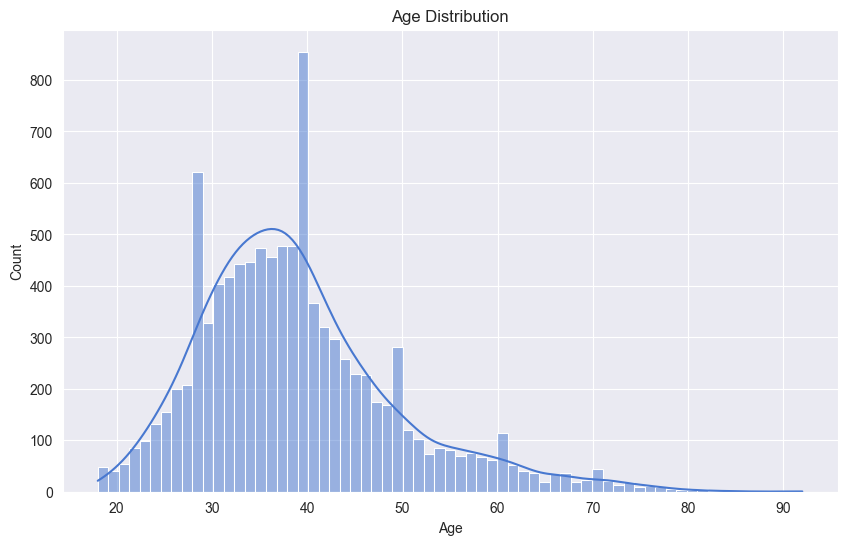

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

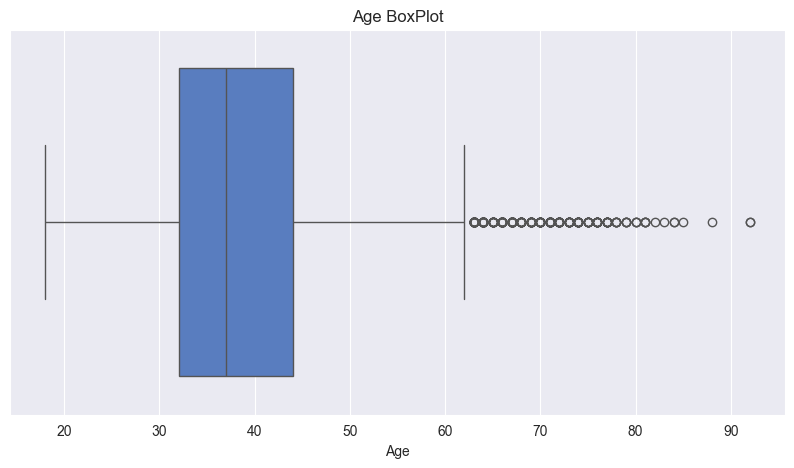

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])
plt.title('Age BoxPlot')
plt.show()

In [32]:
col = 'Age'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
outliers = outlier_rows.shape[0]
percentage = (outliers / df.shape[0]) * 100
print(f"Number of outliers in {col}: {outliers}")
print(f"Percentage of outliers in {col}: {round(percentage,2)}%")


Number of outliers in Age: 359
Percentage of outliers in Age: 3.59%


In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [34]:
df['Tenure'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Tenure,10000.0,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0


In [35]:
df['Tenure'].nunique()

11

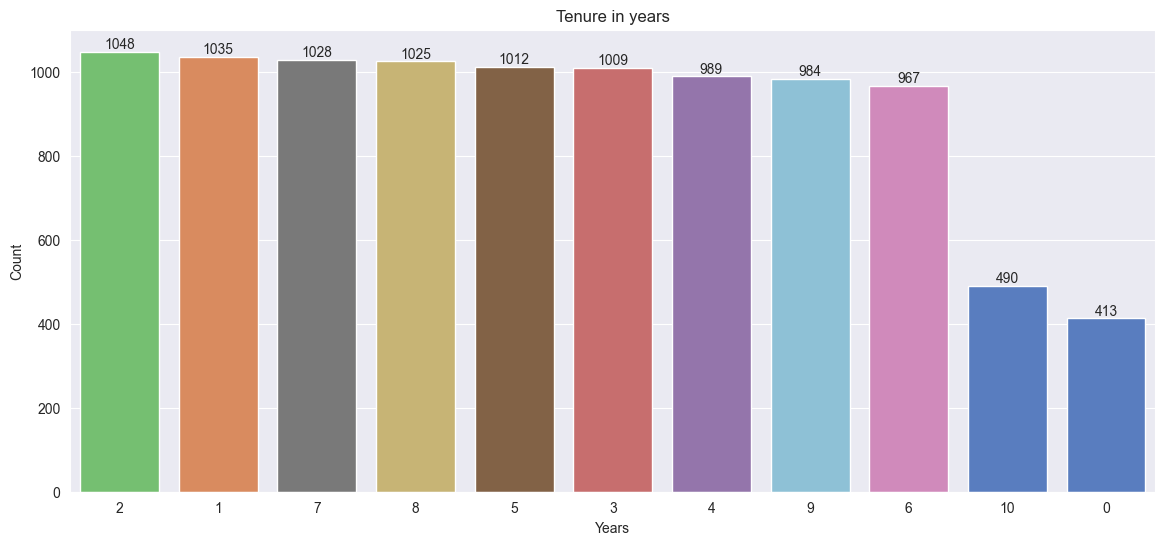

In [36]:
value_counts = df['Tenure'].value_counts()

plt.figure(figsize=(14,6))
bp = sns.barplot(x=value_counts.index, y=value_counts.values, order=value_counts.index, palette="muted", hue=value_counts.index, legend=False)

for i, count in enumerate(value_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.title("Tenure in years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

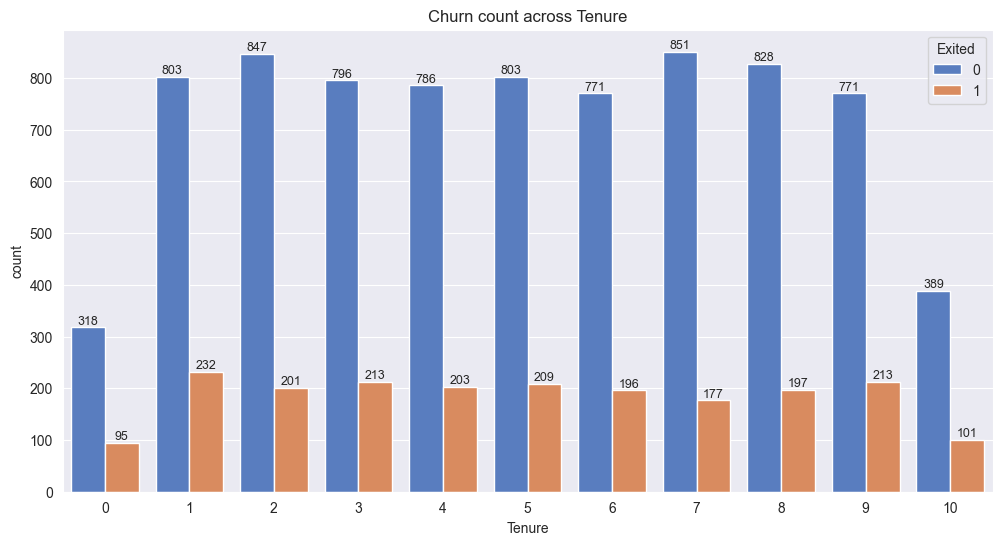

In [37]:
plt.figure(figsize=(12,6))
cp = sns.countplot(data=df, x='Tenure', hue='Exited')

for container in cp.containers:
    cp.bar_label(container, label_type='edge', fontsize=9)

plt.title("Churn count across Tenure")
plt.show()

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [39]:
df['Balance'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Balance,10000.0,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09


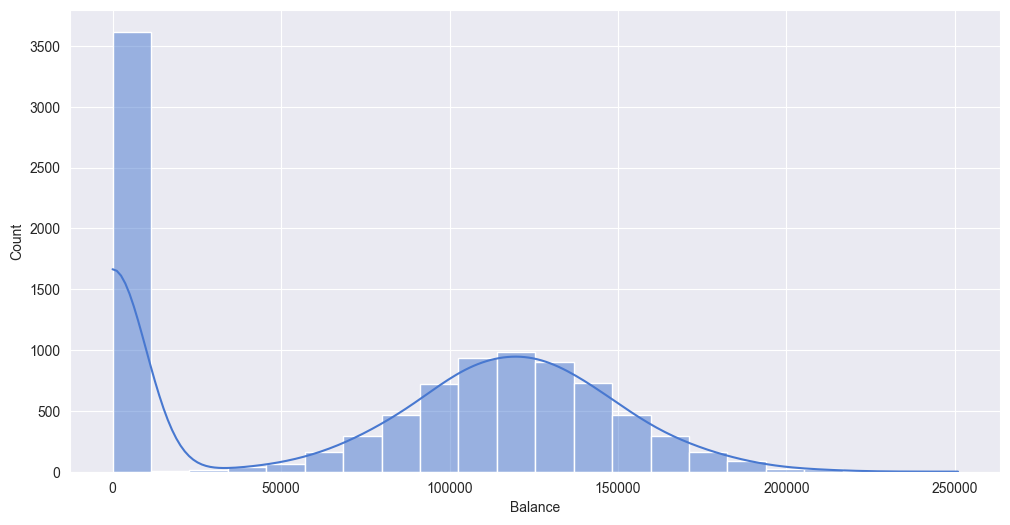

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df['Balance'], kde=True)
plt.show()

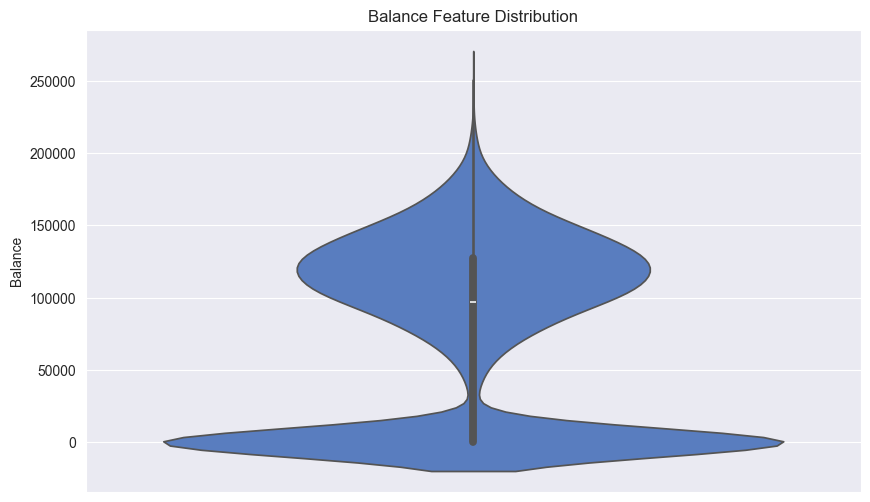

In [41]:
plt.figure(figsize=(10,6))
sns.violinplot(df['Balance'])
plt.title("Balance Feature Distribution")
plt.show()

In [42]:
df[df['Balance'] == 0].shape[0]

3617

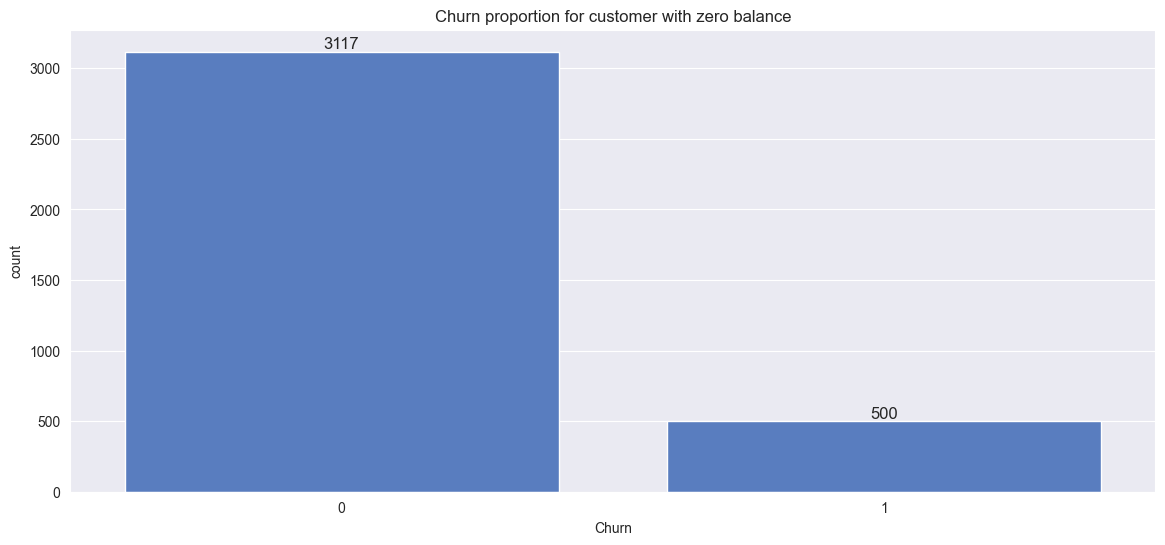

In [43]:
plt.figure(figsize=(14,6))
bars = sns.barplot(df[df['Balance'] == 0]['Exited'].value_counts())

for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', fontsize=12)

plt.title("Churn proportion for customer with zero balance")
plt.xlabel("Churn")
plt.show()

In [44]:
zero_balance_pct = ((df['Balance'] == 0).sum() / df.shape[0]) * 100
print(f"Zero balance: {round(zero_balance_pct,2)}% of customers")

Zero balance: 36.17% of customers


In [45]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
df_zero_balance = df[df['Balance'] == 0]

print(f"Average Credit Score: {df_zero_balance['CreditScore'].mean():.0f}")
print(f"Geography: {df_zero_balance['Geography'].mode()[0]}")
print(f"Gender: {df_zero_balance['Gender'].mode()[0]}")
print(f"Average Age: {df_zero_balance['Age'].mean():.0f}")
print(f"Average Tenure: {df_zero_balance['Tenure'].mean():.0f}")
print(f"Average # Products: {df_zero_balance['NumOfProducts'].mean():.0f}")
print(f"Has Card: {df_zero_balance['HasCrCard'].mode()[0]}")
print(f"Is Active Member: {df_zero_balance['IsActiveMember'].mode()[0]}")
print(f"Est Salary: {df_zero_balance['EstimatedSalary'].mean():.2f}")

Average Credit Score: 649
Geography: France
Gender: Male
Average Age: 38
Average Tenure: 5
Average # Products: 2
Has Card: 1.0
Is Active Member: 1.0
Est Salary: 98983.56


In [47]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [48]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

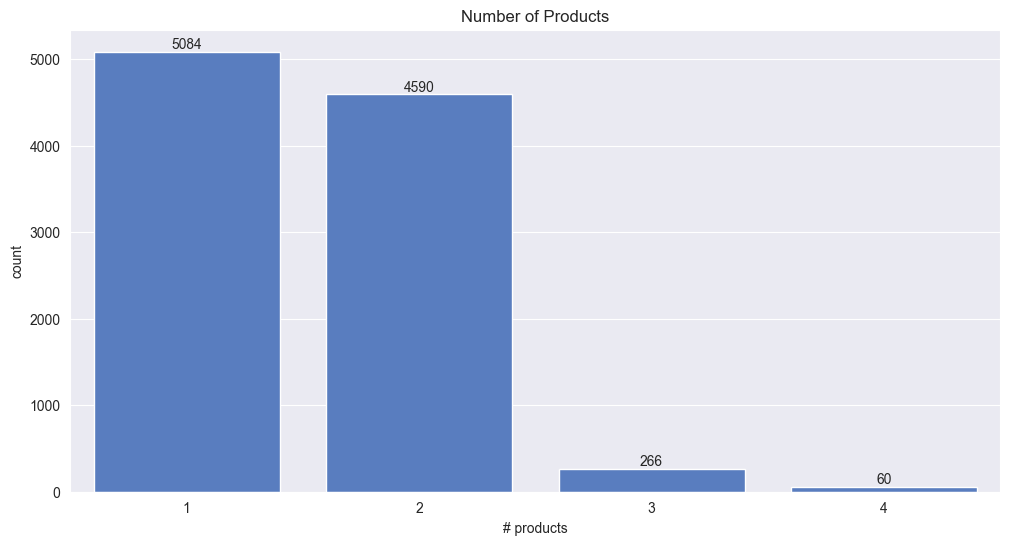

In [49]:
plt.figure(figsize=(12,6))
cp = sns.countplot(x=df['NumOfProducts'])
cp.bar_label(cp.containers[0])
plt.title("Number of Products")
plt.xlabel("# products")
plt.show()

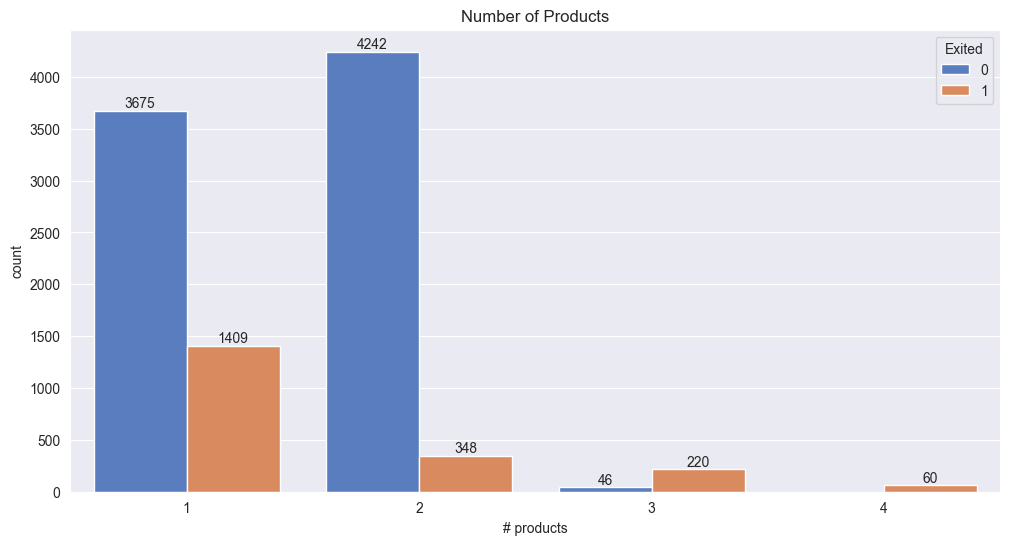

In [50]:
plt.figure(figsize=(12,6))
cp = sns.countplot(x=df['NumOfProducts'], hue=df['Exited'])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.title("Number of Products")
plt.xlabel("# products")
plt.show()

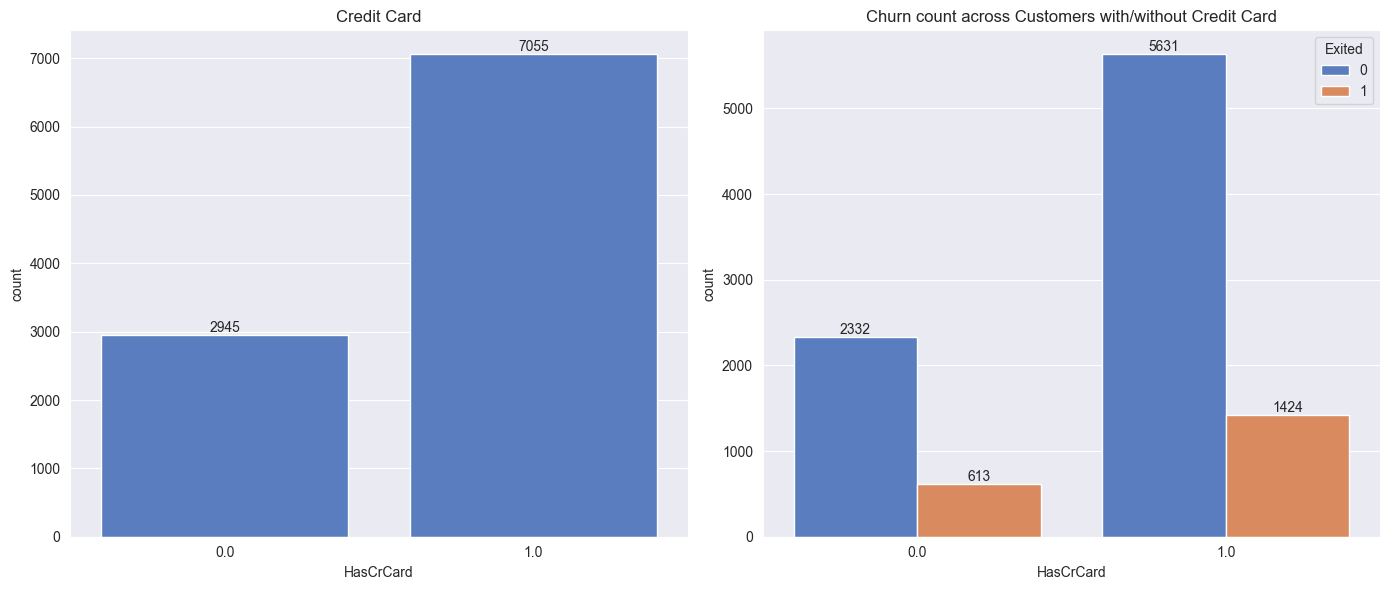

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First bar plot
cp = sns.countplot(data=df, x='HasCrCard', ax=axes[0])
cp.bar_label(cp.containers[0])
axes[0].set_title('Credit Card')

# Second bar plot
cp = sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=axes[1])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
axes[1].set_title('Churn count across Customers with/without Credit Card')

plt.tight_layout()
plt.show()

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


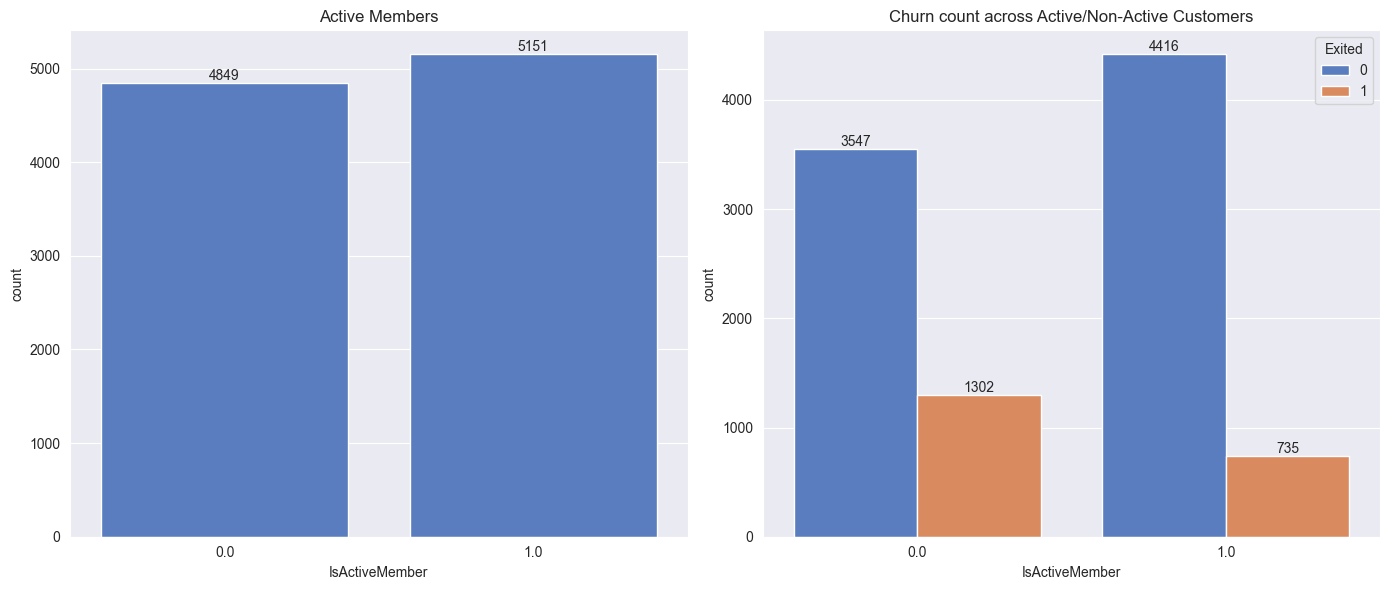

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First bar plot
cp = sns.countplot(data=df, x='IsActiveMember', ax=axes[0])
cp.bar_label(cp.containers[0])
axes[0].set_title('Active Members')

# Second bar plot
cp = sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axes[1])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
axes[1].set_title('Churn count across Active/Non-Active Customers')

plt.tight_layout()
plt.show()

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [55]:
df['EstimatedSalary'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


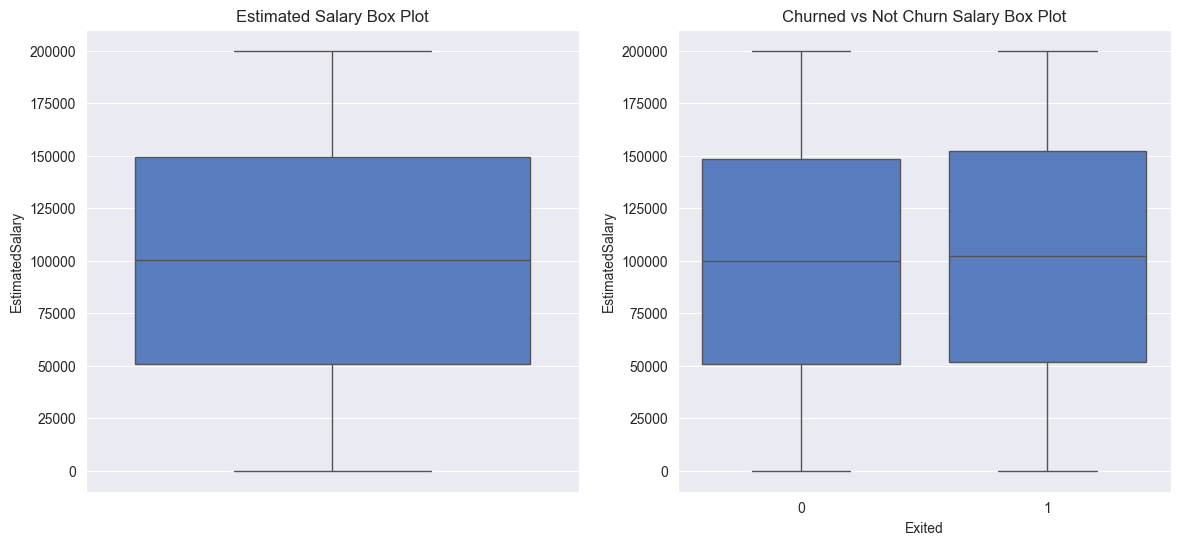

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(y=df['EstimatedSalary'], ax=axes[0])
axes[0].set_title('Estimated Salary Box Plot')

sns.boxplot(y=df['EstimatedSalary'], x=df['Exited'], ax=axes[1])
axes[1].set_title('Churned vs Not Churn Salary Box Plot')

plt.show()

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [61]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [63]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10


In [72]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 859.4+ KB


In [69]:
encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
transformed = encoder.fit_transform(X.loc[:,['Geography', 'Gender']])

transformed.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0


In [70]:
X = pd.concat([X, transformed], axis=1).drop(columns=['Geography', 'Gender'])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,0.0,0.0,0.0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0.0,1.0,0.0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,0.0,0.0,0.0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0.0,0.0,0.0
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0.0,1.0,0.0


#### hyper parameter tuning

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  float64
 9   Geography_Spain    10000 non-null  float64
 10  Gender_Male        10000 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 937.5 KB


In [78]:
X_int = X.select_dtypes(include='int64')

for col in X_int.columns:
    X[col] = X[col].astype(float)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  float64
 9   Geography_Spain    10000 non-null  float64
 10  Gender_Male        10000 non-null  float64
dtypes: float64(11)
memory usage: 937.5 KB


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [80]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7998,829.0,28.0,3.0,132405.52,3.0,1.0,0.0,104889.20,1.0,0.0,1.0
3584,506.0,28.0,8.0,53053.76,1.0,0.0,1.0,24577.34,1.0,0.0,1.0
4295,476.0,34.0,8.0,111905.43,1.0,0.0,1.0,197221.81,1.0,0.0,0.0
5560,564.0,35.0,4.0,0.00,1.0,1.0,0.0,158937.55,0.0,0.0,1.0
651,720.0,52.0,7.0,0.00,1.0,1.0,1.0,14781.12,0.0,0.0,1.0


In [81]:
X_nums = X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
X_nums.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
7998,829.0,28.0,3.0,132405.52,3.0,104889.20
3584,506.0,28.0,8.0,53053.76,1.0,24577.34
4295,476.0,34.0,8.0,111905.43,1.0,197221.81
5560,564.0,35.0,4.0,0.00,1.0,158937.55
651,720.0,52.0,7.0,0.00,1.0,14781.12


In [85]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled.loc[:, X_nums.columns] = scaler.fit_transform(X_train_scaled.loc[:, X_nums.columns])
X_train_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7998,1.852015,-1.046484,-0.682437,0.889211,2.512337,1.0,0.0,0.083135,1.0,0.0,1.0
3584,-1.492465,-1.046484,1.047770,-0.383245,-0.910174,0.0,1.0,-1.311700,1.0,0.0,1.0
4295,-1.803098,-0.475497,1.047770,0.560479,-0.910174,0.0,1.0,1.686743,1.0,0.0,0.0
5560,-0.891908,-0.380333,-0.336396,-1.233996,-0.910174,1.0,0.0,1.021832,0.0,0.0,1.0
651,0.723382,1.237462,0.701729,-1.233996,-0.910174,1.0,1.0,-1.481838,0.0,0.0,1.0


In [86]:
smote = SMOTE(random_state=33)
X_train_scaled_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [92]:
param_grid = [
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.01, 0.05, 0.1, 0.5, 1, 10]
    },

    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.05, 0.1, 0.5, 1, 10]
    },

    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.5],  # balanced mix
        'C': [0.01, 0.05, 0.1, 0.5, 1]
    }
]

log_model = LogisticRegression()
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled_resampled, y_resampled)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7155398832413572
Best Estimator: LogisticRegression(C=0.01)


In [93]:
smote = SMOTE(random_state=33)
X_train_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [95]:
param_grid = {
    'n_estimators': [100, 200],          
    'max_depth': [None, 5, 10],          
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 2],          
    'max_features': ['sqrt', 'log2']     
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_resampled)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9083074858003073
Best Estimator: RandomForestClassifier(max_features='log2', n_estimators=200)


In [98]:
param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [3, 5, 7],                   
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0,1]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_resampled)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Params: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Score: 0.8795185662168897
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
